# Lab Assignment 1

## Implement Perceptron Learning Algorithm (PLA)

Code the perceptron learning algorithm for OR, NOT, and AND gates using Python. Show the weights after each update. Plot the decision boundary after each weight update using Python built-in packages. (K4)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def bias_add(X: np.ndarray) -> np.ndarray:
    return np.hstack([np.ones((X.shape[0], 1)), X])

In [ ]:
def to_2d(X: np.ndarray) -> np.ndarray:
    if X.shape[1] == 1:
        return np.hstack([X, np.zeros((X.shape[0], 1))])
    return X

In [ ]:
def predict_label(w: np.ndarray, x_aug: np.ndarray) -> int:
    return 1 if np.dot(w, x_aug) >= 0 else 0

In [ ]:
def plot_decision_boundary(ax, X2d, y, w, title):
    class0 = y == 0
    class1 = y == 1
    ax.scatter(X2d[class0, 0], X2d[class0, 1], marker='o', label='Class 0')
    ax.scatter(X2d[class1, 0], X2d[class1, 1], marker='s', label='Class 1')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)

    w0, w1, w2 = w
    if np.isclose(w2, 0.0):
        if not np.isclose(w1, 0.0):
            x_vert = -w0 / w1
            ax.axvline(x=x_vert, linestyle='--', label='Decision Boundary')
    else:
        xs = np.linspace(-0.5, 1.5, 100)
        ys = -(w0 + w1 * xs) / w2
        ax.plot(xs, ys, '--', label='Decision Boundary')

    ax.legend()

In [ ]:
class Perceptron:
    def __init__(self, lr=1.0, n_epochs=10, random_state=42, verbose=True):
        self.lr = lr
        self.n_epochs = n_epochs
        self.rng = np.random.RandomState(random_state)
        self.verbose = verbose
        self.w = None
        self.update_steps = 0
        self.snapshots = []
        self.figures = []

    def fit(self, X: np.ndarray, y: np.ndarray, gate_name: str):
        X2d = to_2d(X)
        X_aug = bias_add(X2d)

        self.w = self.rng.uniform(-0.5, 0.5, size=(X2d.shape[1] + 1,))
        if self.verbose:
            print(f"[{gate_name}] Initial weights: {self.w}")

        self.update_steps = 0
        self.snapshots = []

        for epoch in range(1, self.n_epochs + 1):
            error_count = 0
            for i, (xi_aug, target) in enumerate(zip(X_aug, y)):
                y_pred = predict_label(self.w, xi_aug)
                update = self.lr * (target - y_pred)
                if update != 0:
                    self.w += update * xi_aug
                    self.update_steps += 1
                    error_count += 1

                    if self.verbose:
                        print(
                            f"[{gate_name}] Epoch {epoch:02d}, sample {i}, "
                            f"y_true={target}, y_pred={y_pred}, update={update}, "
                            f"new_w={self.w}"
                        )

                    # store snapshot
                    self.snapshots.append({
                        "w": self.w.copy(),
                        "epoch": epoch,
                        "step": self.update_steps
                    })

            if error_count == 0:
                if self.verbose:
                    print(f"[{gate_name}] Converged at epoch {epoch}. Final weights: {self.w}\n")
                break

        self.X2d_ = X2d
        self.y_ = y
        return self.w

In [ ]:
def get_gate_data(gate: str):
    gate = gate.upper()
    if gate == "AND":
        X = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif gate == "OR":
        X = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
        y = np.array([0, 1, 1, 1])
    elif gate == "NOT":
        X = np.array([[0],
                      [1]])
        y = np.array([1, 0])
    return X, y

In [ ]:
gates = ["AND", "OR", "NOT"]
lr = 1.0
n_epochs = 50

[AND] Initial weights: [-0.12545988  0.45071431  0.23199394]
[AND] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  0.45071431 -0.76800606]
[AND] Epoch 01, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988  1.45071431  0.23199394]
[AND] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  1.45071431 -0.76800606]
[AND] Epoch 02, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431 -0.76800606]
[AND] Epoch 02, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  0.23199394]
[AND] Epoch 03, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431  0.23199394]
[AND] Epoch 03, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  1.23199394]
[AND] Epoch 04, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  1.45071431  0.23199394]
[AND] Epoch 04, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  2.45071431  1.23199394]
[AND] Epoch 05, 

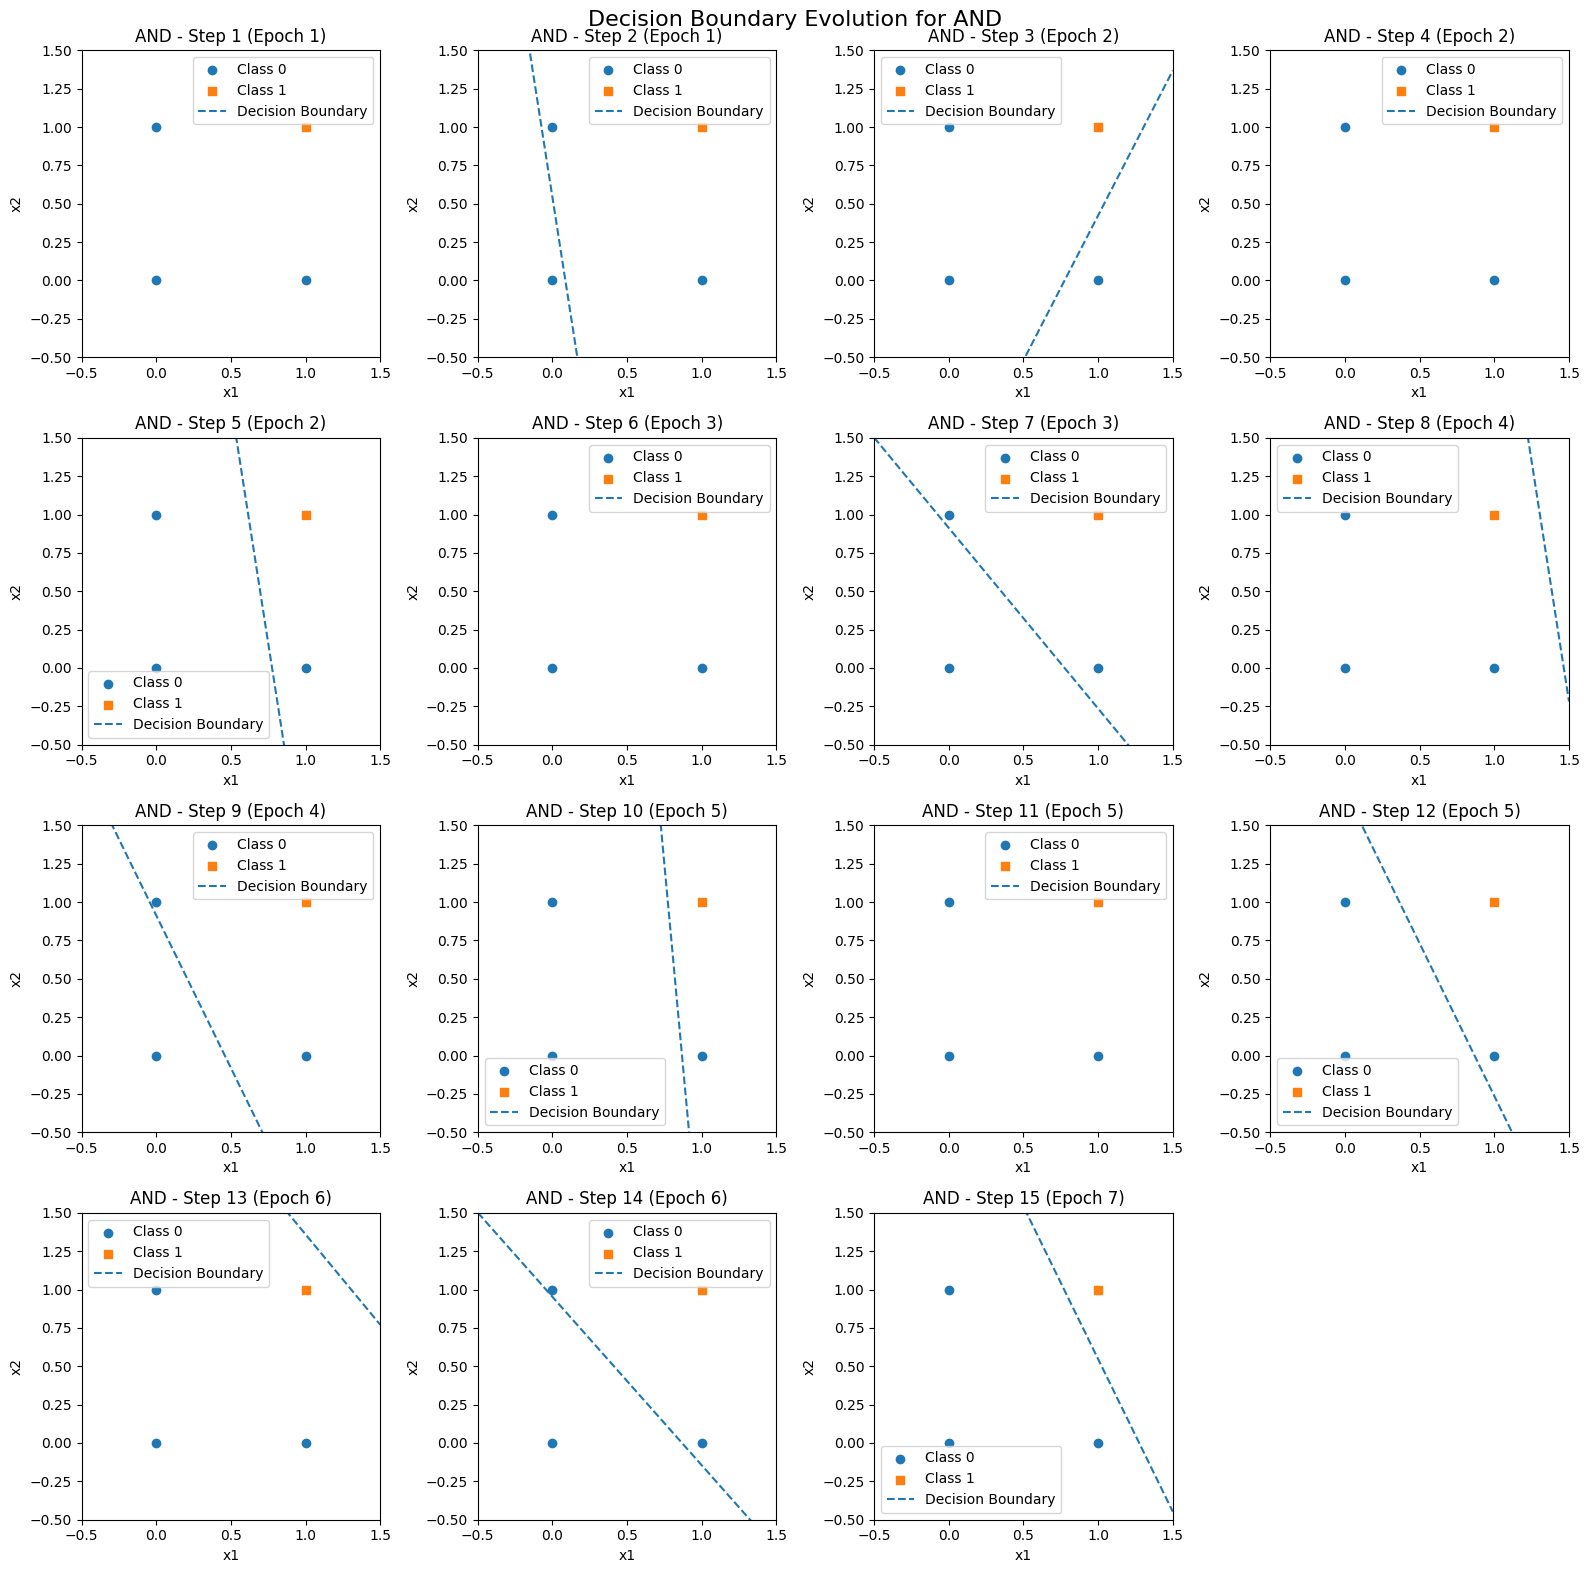

[AND] Training done. Final weights: [-3.12545988  2.45071431  1.23199394]
--------------------------------------------------------------------------------
[OR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[OR] Converged at epoch 1. Final weights: [-0.12545988  0.45071431  0.23199394]

[OR] No weight updates happened (already separable with init weights).
[NOT] Initial weights: [-0.12545988  0.45071431  0.23199394]
[NOT] Epoch 01, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[NOT] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569  0.23199394]
[NOT] Epoch 03, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[NOT] Converged at epoch 4. Final weights: [ 0.87454012 -1.5492

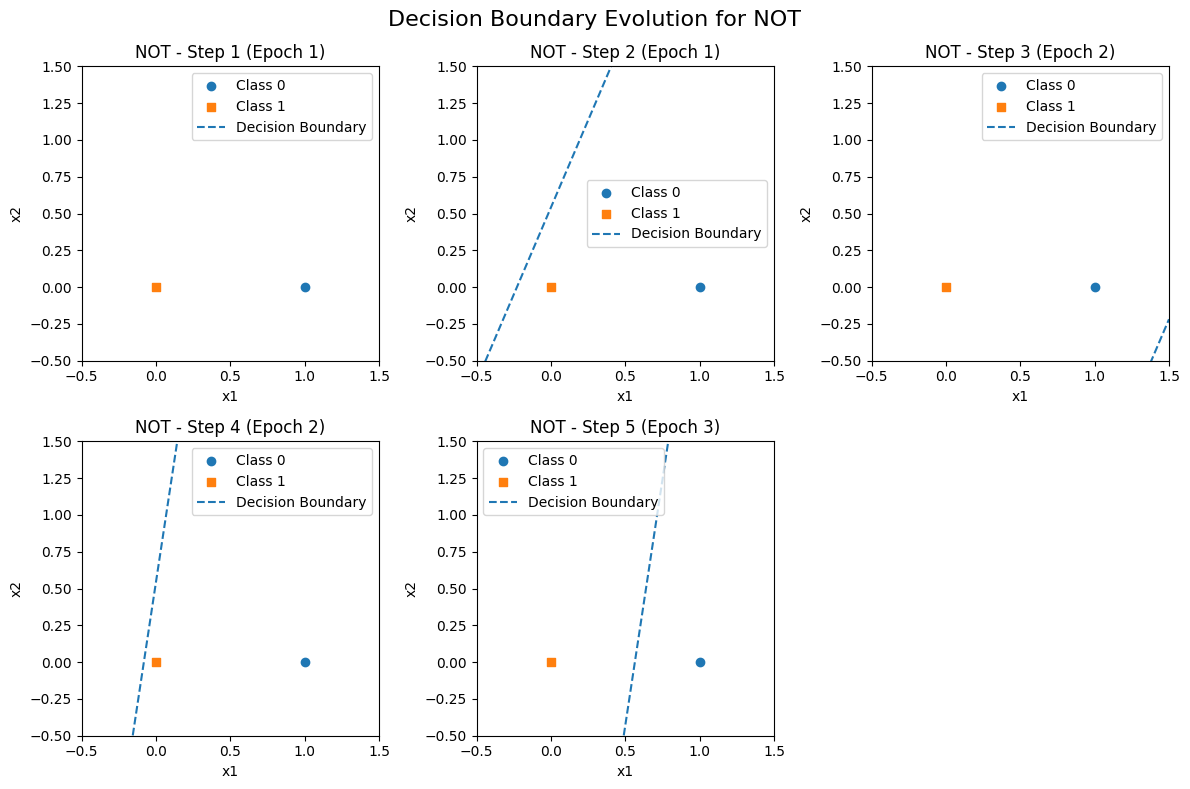

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569  0.23199394]
--------------------------------------------------------------------------------


In [ ]:
import math

for gate in gates:
    X, y = get_gate_data(gate)
    p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
    final_w = p.fit(X, y, gate_name=gate)

    snaps = p.snapshots
    n = len(snaps)
    if n == 0:
        print(f"[{gate}] No weight updates happened (already separable with init weights).")
        continue

    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    if rows == 1 and cols == 1:
        axs = np.array([axs])
    axs = axs.flatten()

    for i, s in enumerate(snaps):
        w = s["w"]
        step = s["step"]
        epoch = s["epoch"]
        plot_decision_boundary(
            ax=axs[i],
            X2d=p.X2d_,
            y=p.y_,
            w=w,
            title=f"{gate} - Step {step} (Epoch {epoch})"
        )

    # hide unused axes
    for j in range(n, len(axs)):
        axs[j].axis('off')

    plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"[{gate}] Training done. Final weights: {final_w}")
    print("-" * 80)

[AND] Initial weights: [-0.12545988  0.45071431  0.23199394]
[AND] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  0.45071431 -0.76800606]
[AND] Epoch 01, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988  1.45071431  0.23199394]
[AND] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  1.45071431 -0.76800606]
[AND] Epoch 02, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431 -0.76800606]
[AND] Epoch 02, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  0.23199394]
[AND] Epoch 03, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431  0.23199394]
[AND] Epoch 03, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  1.23199394]
[AND] Epoch 04, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  1.45071431  0.23199394]
[AND] Epoch 04, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  2.45071431  1.23199394]
[AND] Epoch 05, 

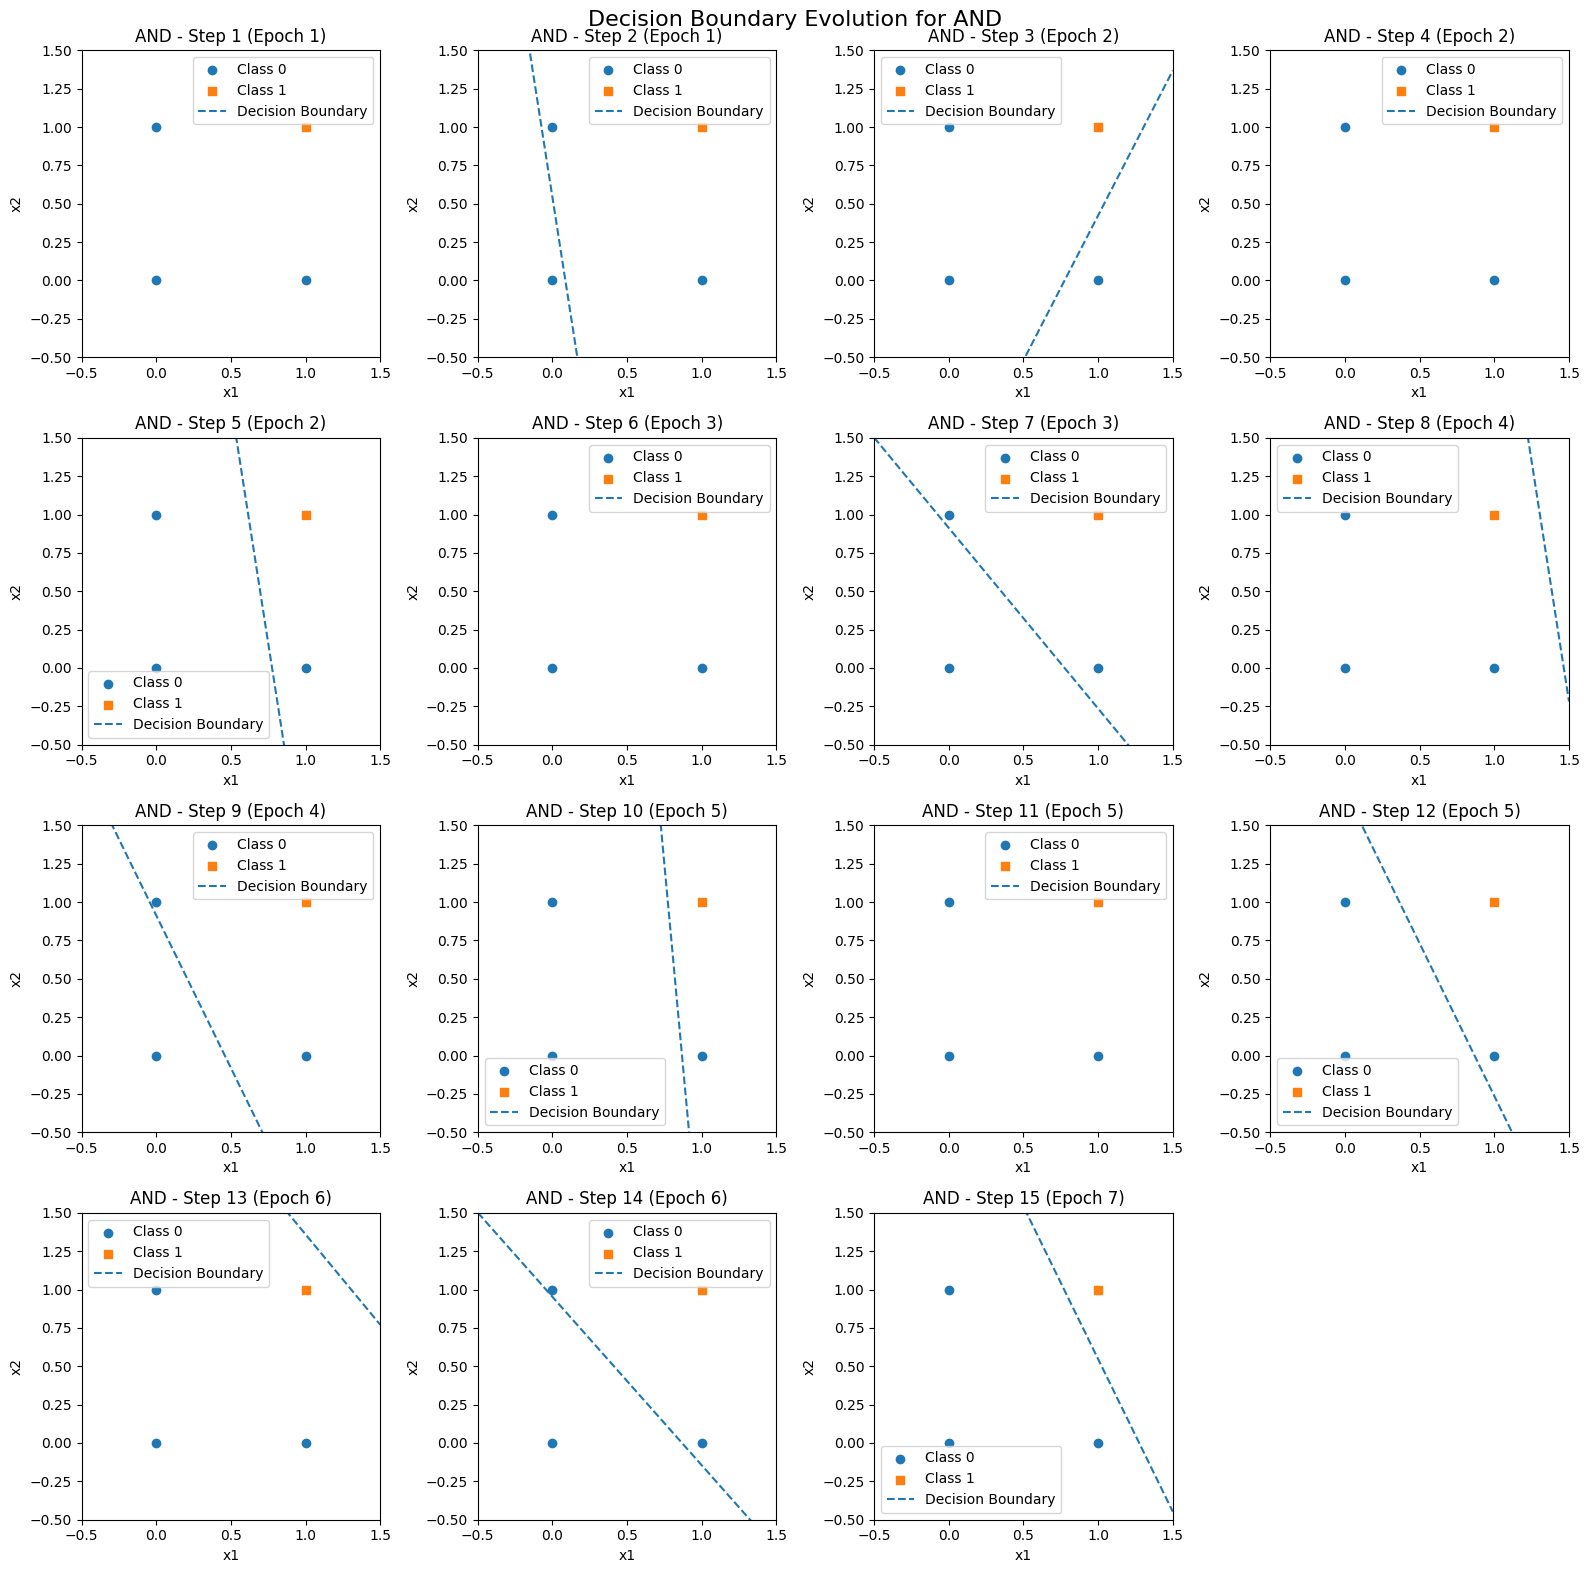

[AND] Training done. Final weights: [-3.12545988  2.45071431  1.23199394]
--------------------------------------------------------------------------------
[OR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[OR] Converged at epoch 1. Final weights: [-0.12545988  0.45071431  0.23199394]

[OR] No weight updates happened (already separable with initial weights).
[NOT] Initial weights: [-0.12545988  0.45071431  0.23199394]
[NOT] Epoch 01, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[NOT] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569  0.23199394]
[NOT] Epoch 03, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[NOT] Converged at epoch 4. Final weights: [ 0.87454012 -1.5

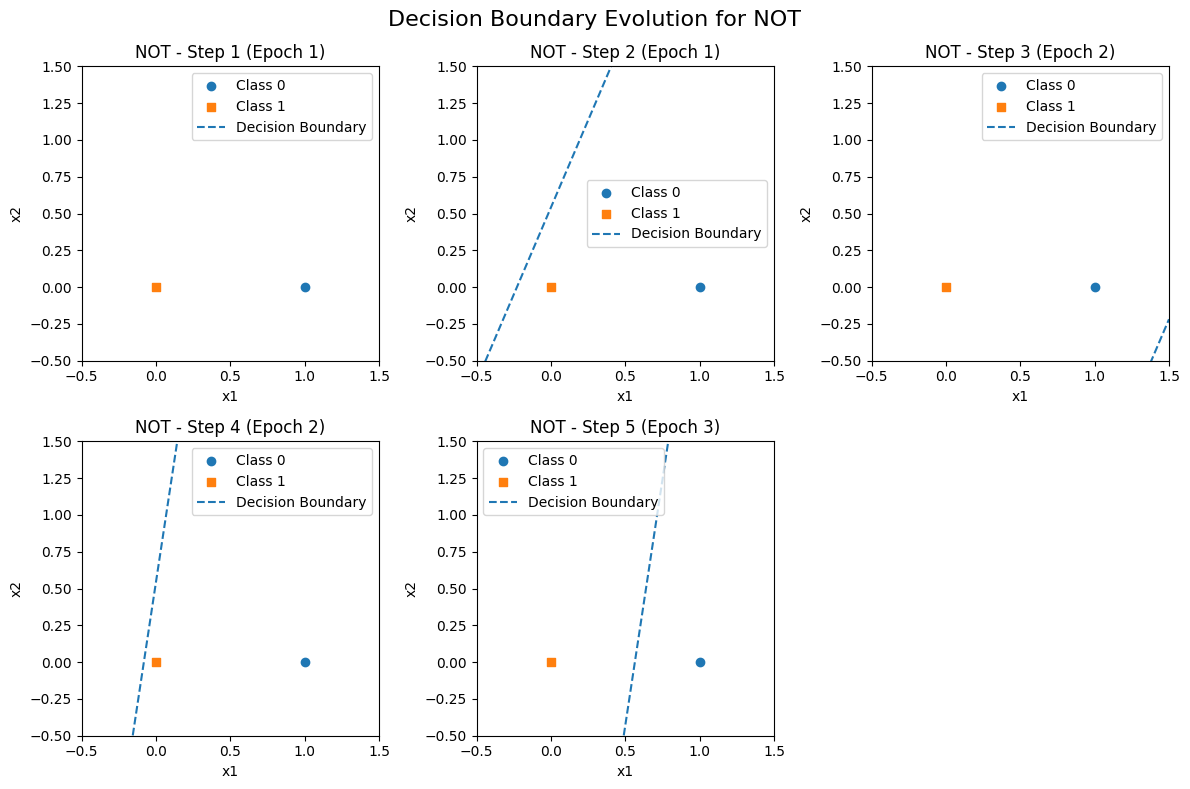

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569  0.23199394]
--------------------------------------------------------------------------------


In [ ]:
for gate in gates:
    X, y = get_gate_data(gate)
    p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
    final_w = p.fit(X, y, gate_name=gate)

    snaps = p.snapshots
    n = len(snaps)

    if n == 0:
        print(f"[{gate}] No weight updates happened (already separable with initial weights).")
        continue

    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    if rows == 1 and cols == 1:
        axs = np.array([axs])
    axs = axs.flatten()

    for i, s in enumerate(snaps):
        w = s["w"]
        step = s["step"]
        epoch = s["epoch"]
        plot_decision_boundary(
            ax=axs[i],
            X2d=p.X2d_,
            y=p.y_,
            w=w,
            title=f"{gate} - Step {step} (Epoch {epoch})"
        )

    for j in range(n, len(axs)):
        axs[j].axis('off')

    plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"[{gate}] Training done. Final weights: {final_w}")
    print("-" * 80)


## Perceptron on XOR

Code the perceptron learning algorithm for the XOR gate using Python. Show the weights after each update. Plot the decision boundary after each weight update using Python's built-in packages. Analyze and identify the pattern that prevents the algorithm from converging.

In [ ]:
def get_xor_data():
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=float)
    y = np.array([0, 1, 1, 0])
    return X, y

[XOR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[XOR] Epoch 01, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988 -0.54928569 -0.76800606]
[XOR] Epoch 02, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[XOR] Epoch 02, sample 2, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[XOR] Epoch 02, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569 -0.76800606]
[XOR] Epoch 03, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[XOR] Epoch 03, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569 -0.76800606]
[XOR] Epoch 04, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[XOR] Epoch 04, sample 2, y_true=1, y_pred=0, update=1.0, new_w=[ 1.87454012 -0.54928569  0.23199394]
[XOR] Epoch 04, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[ 0.87454012 -1.54928569 -0.76800606]
[XOR] Epoch 05, samp

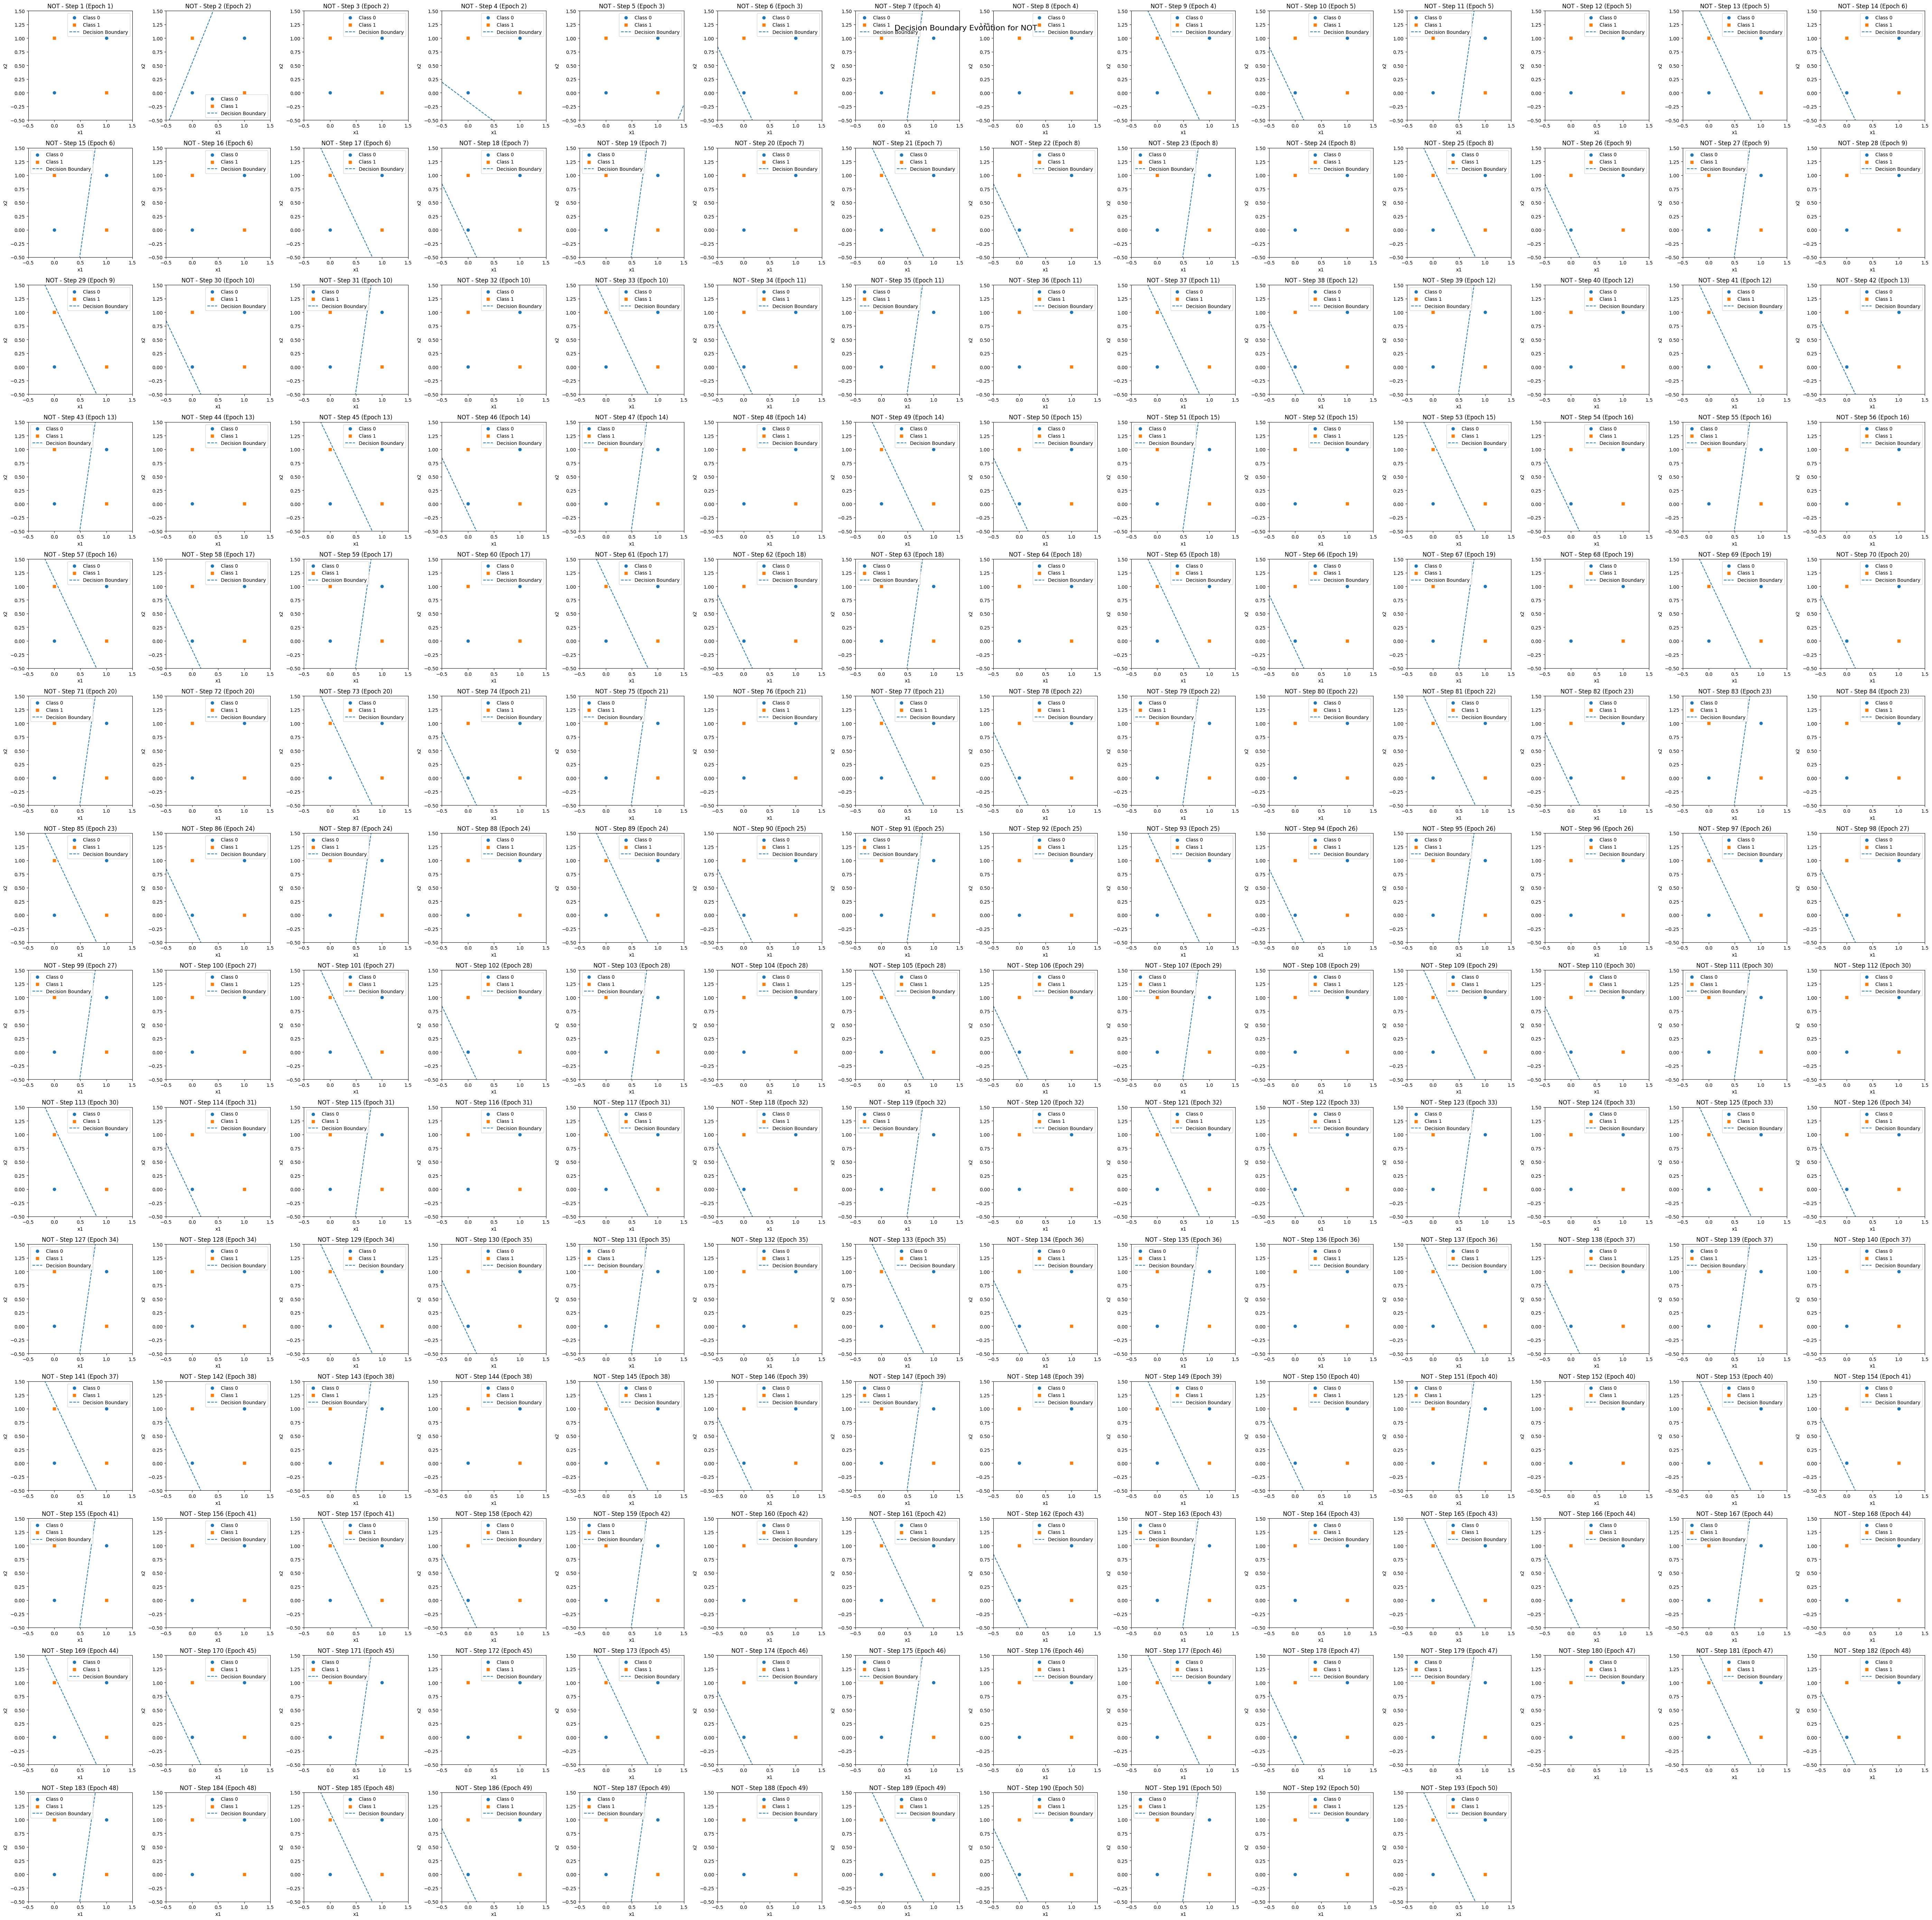

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569 -0.76800606]
--------------------------------------------------------------------------------


In [ ]:
X, y = get_xor_data()
p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
final_w = p.fit(X, y, gate_name="XOR")

snaps = p.snapshots
n = len(snaps)

if n == 0:
    print(f"[{gate}] No weight updates happened (already separable with initial weights).")

cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
if rows == 1 and cols == 1:
    axs = np.array([axs])
axs = axs.flatten()

for i, s in enumerate(snaps):
    w = s["w"]
    step = s["step"]
    epoch = s["epoch"]
    plot_decision_boundary(
        ax=axs[i],
        X2d=p.X2d_,
        y=p.y_,
        w=w,
        title=f"{gate} - Step {step} (Epoch {epoch})"
    )

for j in range(n, len(axs)):
    axs[j].axis('off')

plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
plt.tight_layout()
plt.show()

print(f"[{gate}] Training done. Final weights: {final_w}")
print("-" * 80)

### Why XOR isnt converging?

* The perceptron tries to find a **linear decision boundary** to separate classes.
* XOR’s output pattern is **not linearly separable**; no straight line can separate the classes perfectly.
* Points of the same class lie diagonally opposite, making linear separation impossible.
* Because of this, the perceptron keeps updating weights endlessly, trying to correct misclassifications.
* The weight updates **oscillate and cycle without stabilizing**.
* This continuous flipping prevents the algorithm from converging (training error never reaches zero).
* Hence, the perceptron fails to learn the XOR function.
* To solve XOR, a **multi-layer perceptron (MLP)** with nonlinear activation functions is needed.


# Lab Assignment - 2

Write a Python function to find the minima of the following functions using gradient descent,
           a) f(x,y) = (x−5)2  + (y+2)2 the descent starts at (0,0)
           b) f(x,y) =(x² + y - 11)² + (x + y² - 7)². Try starting the descent at (2,2), (-2,2), (2,-2), and (-2,-2).
Plot the graph after every 5 epochs. Run the above two scenarios with a learning rate of 0.1 and 2.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [ ]:
def f_a(xy):
    x, y = xy
    return (x - 5) ** 2 + (y + 2) ** 2

def grad_f_a(xy):
    x, y = xy
    # gradient of (x-5)^2 is 2*(x-5); of (y+2)^2 is 2*(y+2)
    return np.array([2 * (x - 5), 2 * (y + 2)])

def f_b(xy):
    x, y = xy
    # Himmelblau's function: (x^2 + y - 11)^2 + (x + y^2 -7)^2
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

def grad_f_b(xy):
    x, y = xy
    # Partial derivatives from analytic computation
    # Let A = x^2 + y - 11, B = x + y^2 - 7
    A = x ** 2 + y - 11
    B = x + y ** 2 - 7
    dfdx = 2 * A * (2 * x) + 2 * B * 1
    dfdy = 2 * A * 1 + 2 * B * (2 * y)
    return np.array([dfdx, dfdy])

In [ ]:
def gradient_descent(func, grad_func, start, lr, max_epochs=1000, log_every=5):
    xy = np.array(start, dtype=float)
    history = [xy.copy()]
    fvals = [func(xy)]
    diverged = False

    for epoch in range(1, max_epochs + 1):
        g = grad_func(xy)
        xy = xy - lr * g
        fval = func(xy)

        history.append(xy.copy())
        fvals.append(fval)

        if np.isnan(fval) or np.isinf(fval) or fval > 1e6:
            diverged = True
            print(f"  [!] Diverged at epoch {epoch}, fval={fval}")
            break

        if epoch % log_every == 0:
            print(f"Epoch {epoch:03d} | lr={lr:.3g} | x={xy[0]:.5f}, y={xy[1]:.5f} | f={fval:.6f}")

    return np.array(history), np.array(fvals), diverged

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def plot_descent(func, history, title, ax=None):
    x_vals = history[:, 0]
    y_vals = history[:, 1]

    margin = 1.5
    x_min, x_max = x_vals.min() - margin, x_vals.max() + margin
    y_min, y_max = y_vals.min() - margin, y_vals.max() + margin
    xs = np.linspace(x_min, x_max, 400)
    ys = np.linspace(y_min, y_max, 400)
    X, Y = np.meshgrid(xs, ys)
    Z = np.vectorize(lambda xx, yy: func(np.array([xx, yy])))(X, Y)

    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 4))

    # contour
    levels = np.logspace(np.log10(Z.min()+1e-6), np.log10(Z.max()+1e-6), 25)
    cs = ax.contour(X, Y, Z, levels=levels, norm=LogNorm(), cmap="viridis")
    ax.plot(x_vals, y_vals, marker='o', markersize=3, linewidth=1.5, label="descent path")
    ax.scatter([x_vals[0]], [y_vals[0]], color='green', label="start", zorder=5)
    ax.scatter([x_vals[-1]], [y_vals[-1]], color='red', label="end", zorder=5)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True)

In [ ]:
def run_experiment():
    # Part (a): f_a, start at (0,0)
    print("\n(a): f(x,y) = (x-5)^2 + (y+2)^2")
    starts_a = [(0, 0)]
    for lr in [0.1, 2]:
        for start in starts_a:
            print(f"\nStarting gradient descent on (a) from {start} with lr={lr}")
            history, fvals, diverged = gradient_descent(f_a, grad_f_a, start, lr,
                                                        max_epochs=100, log_every=5)
            final_pt = history[-1]
            print(f"Final point: x={final_pt[0]:.6f}, y={final_pt[1]:.6f}, f={fvals[-1]:.6f}")
            num_plots = len(history) // 5
            if num_plots > 0:
                fig, axs = plt.subplots(1, num_plots, figsize=(4 * num_plots, 4))
                if num_plots == 1:
                    axs = [axs]
                for i, ax in enumerate(axs):
                    idx = (i + 1) * 5
                    if idx >= len(history):
                        idx = len(history) - 1
                    plot_descent(f_a, history[:idx+1], title=f"(a) lr={lr}, epoch={idx}", ax=ax)
                plt.tight_layout()
                plt.show()
            else:
                print("  Skipping plot: Not enough steps recorded for plotting.")


    # Part (b): Himmelblau's function, four starting points
    print("\n(b): Himmelblau's function")
    starts_b = [(2, 2), (-2, 2), (2, -2), (-2, -2)]
    for lr in [0.1, 2]:
        for start in starts_b:
            print(f"\nStarting gradient descent on (b) from {start} with lr={lr}")
            history, fvals, diverged = gradient_descent(f_b, grad_f_b, start, lr,
                                                        max_epochs=200, log_every=5)
            final_pt = history[-1]
            print(f"Final point: x={final_pt[0]:.6f}, y={final_pt[1]:.6f}, f={fvals[-1]:.6f}")
            num_snapshots = min(8, len(history) // 5)
            if num_snapshots > 0:
                fig, axs = plt.subplots(2, num_snapshots//2, figsize=(5 * (num_snapshots//2), 8))
                axs = axs.flatten()
                for i in range(num_snapshots):
                    epoch_idx = (i + 1) * 5
                    if epoch_idx >= len(history):
                        epoch_idx = len(history) - 1
                    plot_descent(f_b, history[:epoch_idx+1],
                                 title=f"(b) lr={lr}, start={start}, epoch={epoch_idx}", ax=axs[i])

                for j in range(num_snapshots, len(axs)):
                    axs[j].axis('off')
                plt.tight_layout()
                plt.show()
            else:
                print("  Skipping plot: Not enough steps recorded for plotting.")


(a): f(x,y) = (x-5)^2 + (y+2)^2

Starting gradient descent on (a) from (0, 0) with lr=0.1
Epoch 005 | lr=0.1 | x=3.36160, y=-1.34464 | f=3.113851
Epoch 010 | lr=0.1 | x=4.46313, y=-1.78525 | f=0.334347
Epoch 015 | lr=0.1 | x=4.82408, y=-1.92963 | f=0.035900
Epoch 020 | lr=0.1 | x=4.94235, y=-1.97694 | f=0.003855
Epoch 025 | lr=0.1 | x=4.98111, y=-1.99244 | f=0.000414
Epoch 030 | lr=0.1 | x=4.99381, y=-1.99752 | f=0.000044
Epoch 035 | lr=0.1 | x=4.99797, y=-1.99919 | f=0.000005
Epoch 040 | lr=0.1 | x=4.99934, y=-1.99973 | f=0.000001
Epoch 045 | lr=0.1 | x=4.99978, y=-1.99991 | f=0.000000
Epoch 050 | lr=0.1 | x=4.99993, y=-1.99997 | f=0.000000
Epoch 055 | lr=0.1 | x=4.99998, y=-1.99999 | f=0.000000
Epoch 060 | lr=0.1 | x=4.99999, y=-2.00000 | f=0.000000
Epoch 065 | lr=0.1 | x=5.00000, y=-2.00000 | f=0.000000
Epoch 070 | lr=0.1 | x=5.00000, y=-2.00000 | f=0.000000
Epoch 075 | lr=0.1 | x=5.00000, y=-2.00000 | f=0.000000
Epoch 080 | lr=0.1 | x=5.00000, y=-2.00000 | f=0.000000
Epoch 085 | l

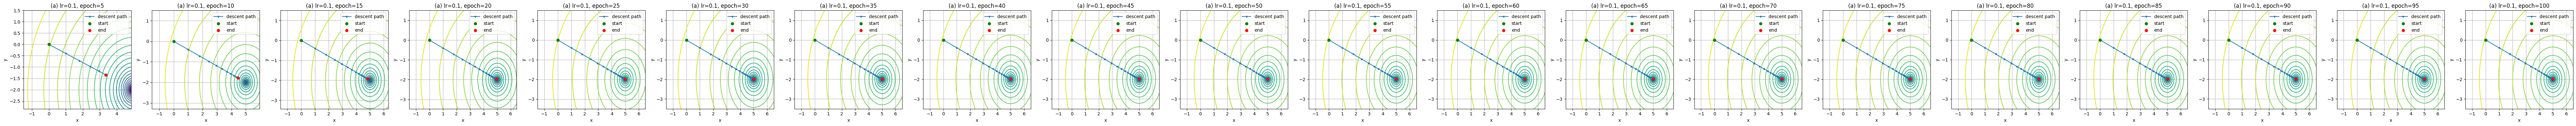


Starting gradient descent on (a) from (0, 0) with lr=2
  [!] Diverged at epoch 5, fval=1712421.0
Final point: x=1220.000000, y=-488.000000, f=1712421.000000


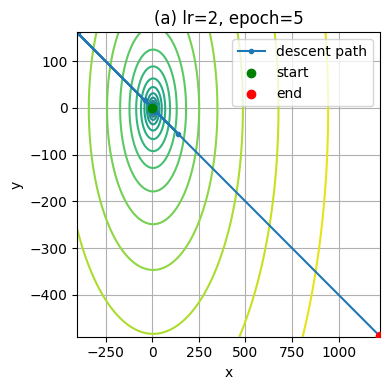


(b): Himmelblau's function

Starting gradient descent on (b) from (2, 2) with lr=0.1
  [!] Diverged at epoch 2, fval=29826802.96754551
Final point: x=-74.003200, y=-23.180800, f=29826802.967546
  Skipping plot: Not enough steps recorded for plotting.

Starting gradient descent on (b) from (-2, 2) with lr=0.1
  [!] Diverged at epoch 2, fval=104282623.10720007
Final point: x=29.600000, y=-100.800000, f=104282623.107200
  Skipping plot: Not enough steps recorded for plotting.

Starting gradient descent on (b) from (2, -2) with lr=0.1
  [!] Diverged at epoch 2, fval=6002702598.126514
Final point: x=-278.393600, y=-14.912000, f=6002702598.126514
  Skipping plot: Not enough steps recorded for plotting.

Starting gradient descent on (b) from (-2, -2) with lr=0.1
  [!] Diverged at epoch 2, fval=687743878.6767963
Final point: x=162.003200, y=-10.508800, f=687743878.676796
  Skipping plot: Not enough steps recorded for plotting.

Starting gradient descent on (b) from (2, 2) with lr=2
  [!] Dive

In [ ]:
run_experiment()



* **Function (a)** is a convex quadratic; gradient descent will reliably converge to the global minimum at **(5, −2)**. With learning rate 0.1 it converges smoothly; with rate 2 it may oscillate or overshoot initially but still reaches near the minimum quickly because the curvature is gentle.
* **Function (b)** is **Himmelblau’s function**, which has **multiple local minima** (four known minima roughly at (3.0, 2.0), (−2.805, 3.131), (−3.779, −3.283), (3.584, −1.848)). The outcome depends on the starting point and learning rate.

  * Starting at different seeds shows convergence to different minima.
  * A high learning rate (e.g., 2) can cause divergence or chaotic jumps, especially near saddle regions.
* **Plotting every 5 epochs** shows the trajectory, allowing you to observe whether descent is smooth, stuck, oscillatory, or diverging.
